In [1]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
house_data = pd.read_csv('data/kc_house_data.csv')

In [3]:
## Reorder columns so that the target variable is the first column
column_headers = list(house_data.columns)
column_headers = [column_headers[2],*column_headers[:2],*column_headers[3:]]
house_data = house_data[column_headers]

In [4]:
mini_house_data = house_data[['id', 'price', 'bedrooms']]

In [5]:
mini_house_data.describe()

,id,price,bedrooms
count,2.159700e+04,2.159700e+04,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200
std,2.876736e+09,3.673681e+05,0.926299
min,1.000102e+06,7.800000e+04,1.000000
25%,2.123049e+09,3.220000e+05,3.000000
50%,3.904930e+09,4.500000e+05,3.000000
75%,7.308900e+09,6.450000e+05,4.000000
max,9.900000e+09,7.700000e+06,33.000000


<AxesSubplot:xlabel='bedrooms'>

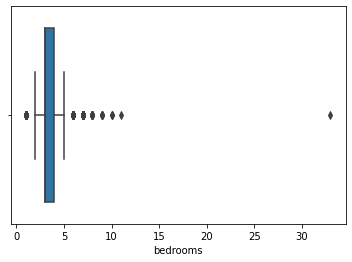

In [6]:
sns.boxplot(x=mini_house_data.bedrooms)

In [7]:
sev_fiv_percentile = np.percentile(mini_house_data.bedrooms, 75)
twe_fiv_percentile = np.percentile(mini_house_data.bedrooms, 25)
bedrooms_iqr = sev_fiv_percentile - twe_fiv_percentile

In [8]:
bedrooms_iqr

1.0

In [9]:
non_outs_mini = mini_house_data.loc[(mini_house_data.bedrooms >= twe_fiv_percentile-1.5*bedrooms_iqr)
                                    & (mini_house_data.bedrooms <= sev_fiv_percentile+1.5*bedrooms_iqr)]

<AxesSubplot:xlabel='bedrooms'>

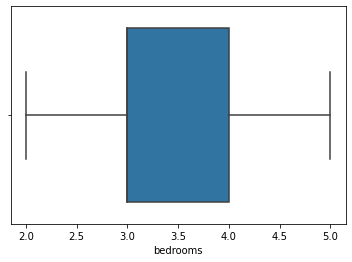

In [10]:
sns.boxplot(x=non_outs_mini.bedrooms)

In [11]:
non_outs_mini.describe()

,id,price,bedrooms
count,2.106700e+04,2.106700e+04,21067.000000
mean,4.587690e+09,5.374412e+05,3.347653
std,2.878604e+09,3.555173e+05,0.800521
min,1.200019e+06,7.800000e+04,2.000000
25%,2.125049e+09,3.225000e+05,3.000000
50%,3.904990e+09,4.500000e+05,3.000000
75%,7.334401e+09,6.400000e+05,4.000000
max,9.900000e+09,7.060000e+06,5.000000


In [12]:
model = ols(formula='price ~ bedrooms', data=non_outs_mini)
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2215.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:12:00   Log-Likelihood:            -2.9810e+05
No. Observations:               21067   AIC:                         5.962e+05
Df Residuals:                   21065   BIC:                         5.962e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.881e+04      1e+04      7.866      0.000    5.92e+04    9.84e+04
bedrooms     1.37e+05   2910.669     47.068      0.000    1.31e+05    1.43e+05
==============================================================================
Omnibus:                    16664.139   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637179.004
Skew:                           3.511   Prob(JB):                         0.00
Kurtosis:                      29.011   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
for_model = house_data[["sqft_living", "price"]].copy()
for_model.dropna(inplace=True)
model2 = ols(formula="price ~ sqft_living", data=for_model)
model2_results = model2.fit()

In [14]:
model2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:12:00   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model2_results.rsquared

0.49268789904035093

In [16]:
model2_results.pvalues

Intercept      2.208888e-23
sqft_living    0.000000e+00
dtype: float64

<div class="alert alert-block alert-info">
<b><font color="black">Heatmap Practice</font></b>
</div>

In [17]:
correlation_of_variable = house_data.corr()

In [18]:
correlation_of_variable

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,-0.016772,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
id,-0.016772,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
bedrooms,0.308787,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,0.276295,-0.004176,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.395734,0.011592,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,0.036056,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


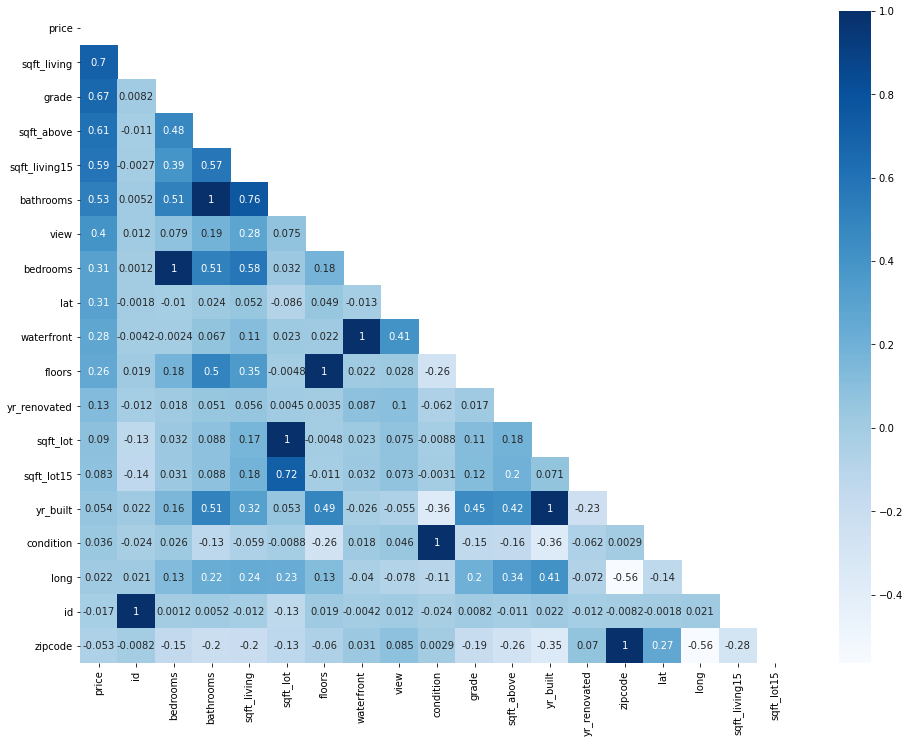

In [19]:
correlation_of_variable = correlation_of_variable.sort_values(by='price', ascending=False)
mask = np.triu(np.ones_like(correlation_of_variable, dtype=np.bool))
fig1, ax1 = plt.subplots(figsize=(16,12))
sns.heatmap(correlation_of_variable,annot=True,annot_kws={'size': 10}, mask=mask, ax=ax1, cmap='Blues');

<div class="alert alert-block alert-info">
<b><font color="black">For Looping Rsquared</font></b>
</div>

In [20]:
r_squared_dataframe = pd.DataFrame(columns=['Feature', 'R-Squared'])
r_squared_dataframe

,Feature,R-Squared


In [21]:
for feature in house_data.columns[2:]:
    loopdf = house_data[['price', feature]]
    model = ols(formula='price ~ {}'.format(feature),data=loopdf)
    model_results = model.fit()
    r_squared_dataframe = r_squared_dataframe.append({'Feature':feature,
                                                      'R-Squared':model_results.rsquared}, ignore_index=True)

In [24]:
r_squared_dataframe.sort_values(by='R-Squared', ascending=False)

,Feature,R-Squared
3,sqft_living,0.492688
9,grade,0.446158
10,sqft_above,0.366470
17,sqft_living15,0.342507
2,bathrooms,0.276577
11,sqft_basement,0.201888
7,view,0.156605
1,bedrooms,0.095350
15,lat,0.094060
6,waterfront,0.076339


In [ ]:
<div class="alert alert-block alert-info">
<b><font color="black">Viewing </font></b>
</div>